# Evaluación continuada 5
## Codificador Rice

Configuración

In [1]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

/home/ferran/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Implementar codigo rice 

In [2]:
def binarize(n):
    cut = 2 if n >=0 else 3
    return bin(n)[cut:]

def rice(n, m):
    q = int(abs(n)/m)
    r = abs(n) % m
    
    # leftpadding para el residuo
    l_padd = int(math.ceil(math.log(m, 2)))
    
    # signo
    if n >= 0:
        s = '1'
    else:
        s ='0'
    
    # cociente
    s += ('1' * q) + '0'
    
    # residuo
    binario = binarize(r)
    s += binario.zfill(l_padd)

    return s
    


a) ¿Cuántos bits son necesarios para codificar todos los enteros entre -1023 y +1023 (en 
codificación binaria natural con bit de signo)?


In [34]:
init = -1023
end = 1023
length = len(binarize(end)) + 1 # + signo
length *= 1023 * 2 + 1 # zero counts
print length, ' bits necesarios'

import math

print int(round(math.log((len(range(-1023,1023))),2)) ), ' bits necesarios'

22517  bits necesarios
11  bits necesarios


b) Calculad el código Rice de todos los enteros N entre -1023 y +1023 con M = 32

In [11]:
rice_code = ''
M = 32
for i in range(-1023,1023):
    rice_code += rice(i,M)
print rice_code





46035


In [16]:
M = 32
for i in range(-1023,1023):
    print i, '-> ', rice(i,M), 'L: ', len(rice(i,M))
    


-1023 ->  01111111111111111111111111111111011111 L:  38
-1022 ->  01111111111111111111111111111111011110 L:  38
-1021 ->  01111111111111111111111111111111011101 L:  38
-1020 ->  01111111111111111111111111111111011100 L:  38
-1019 ->  01111111111111111111111111111111011011 L:  38
-1018 ->  01111111111111111111111111111111011010 L:  38
-1017 ->  01111111111111111111111111111111011001 L:  38
-1016 ->  01111111111111111111111111111111011000 L:  38
-1015 ->  01111111111111111111111111111111010111 L:  38
-1014 ->  01111111111111111111111111111111010110 L:  38
-1013 ->  01111111111111111111111111111111010101 L:  38
-1012 ->  01111111111111111111111111111111010100 L:  38
-1011 ->  01111111111111111111111111111111010011 L:  38
-1010 ->  01111111111111111111111111111111010010 L:  38
-1009 ->  01111111111111111111111111111111010001 L:  38
-1008 ->  01111111111111111111111111111111010000 L:  38
-1007 ->  01111111111111111111111111111111001111 L:  38
-1006 ->  01111111111111111111111111111111001110

¿Para qué rango de valores de N, el código Rice requiere menos bits que la 
codificación binaria natural con bit de signo necesaria para representar todo el rango 
entre -1023 y +1023? Si la mayoría de datos a codificar pertenecen a este rango 
(rango de entrada óptima), el uso de código Rice será aconsejable (habrá ahorro de 
bits) ¿Cuál es el máximo ahorro de bits?


In [36]:
# rango valores
M = 32
minRice = float("+inf");

floor = None
ceiling = None
binary_length = length = len(binarize(1023)) + 1
for i in range(-1023,1023):
    rice_length = len(rice(i,M))
    minRice = min(minRice, rice_length)
    if rice_length < binary_length:
        print i, "-->", rice_length, ":", binary_length
print "Máximo Ahorro: ", (binary_length - minRice), " bits"


-127 --> 10 : 11
-126 --> 10 : 11
-125 --> 10 : 11
-124 --> 10 : 11
-123 --> 10 : 11
-122 --> 10 : 11
-121 --> 10 : 11
-120 --> 10 : 11
-119 --> 10 : 11
-118 --> 10 : 11
-117 --> 10 : 11
-116 --> 10 : 11
-115 --> 10 : 11
-114 --> 10 : 11
-113 --> 10 : 11
-112 --> 10 : 11
-111 --> 10 : 11
-110 --> 10 : 11
-109 --> 10 : 11
-108 --> 10 : 11
-107 --> 10 : 11
-106 --> 10 : 11
-105 --> 10 : 11
-104 --> 10 : 11
-103 --> 10 : 11
-102 --> 10 : 11
-101 --> 10 : 11
-100 --> 10 : 11
-99 --> 10 : 11
-98 --> 10 : 11
-97 --> 10 : 11
-96 --> 10 : 11
-95 --> 9 : 11
-94 --> 9 : 11
-93 --> 9 : 11
-92 --> 9 : 11
-91 --> 9 : 11
-90 --> 9 : 11
-89 --> 9 : 11
-88 --> 9 : 11
-87 --> 9 : 11
-86 --> 9 : 11
-85 --> 9 : 11
-84 --> 9 : 11
-83 --> 9 : 11
-82 --> 9 : 11
-81 --> 9 : 11
-80 --> 9 : 11
-79 --> 9 : 11
-78 --> 9 : 11
-77 --> 9 : 11
-76 --> 9 : 11
-75 --> 9 : 11
-74 --> 9 : 11
-73 --> 9 : 11
-72 --> 9 : 11
-71 --> 9 : 11
-70 --> 9 : 11
-69 --> 9 : 11
-68 --> 9 : 11
-67 --> 9 : 11
-66 --> 9 : 11
-65 --> 9 

In [32]:
# Visualizando los datos sale que entre -127 y 127
# si todos los datos fuesen de ese rango, supongamos que tenemos el numero 1023 y el resto son los numeros
# entre -127 y 127
b_length = len(binarize(1023)) + 1 # + signo
b_length *= 127 * 2 + 1 # zero counts

r = rice(1023,M)
for i in range(-127,127):
    r += rice(i,M)
r_length = len(r)

print "Tenemos un ratio de 1:%.2f, significa que cada bit en rice nos ocupa 1.28 en binario" \
% (b_length/float(r_length))

Tenemos un ratio de 1:1.28, significa que cada bit en rice nos ocupa 1.28 en binaio


¿Para qué valor de M el rango de entrada óptima se extiende entre -255 y +255? 
¿Cuál es el máximo ahorro de bits ahora?

In [37]:
#hagamos un plot con varios rangos

result = []
for m in range(5,10):
    m = 2 ** m
    tmp_result = []
    for i in range(-1023,1023):
        tmp_result.append(len(rice(i,m)))
    result.append(tmp_result)
    

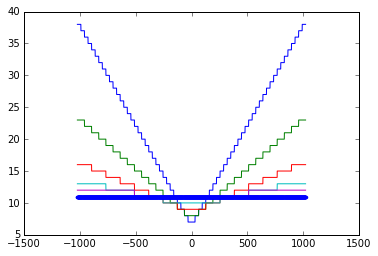

In [38]:
for i,r in enumerate(result):
    plt.plot(range(-1023,1023),r)
    
plt.plot(range(-1023,1023), [11] * len(result[0]), 'b.',) # 11 es la longitud en binario con signo

plt.show()

parece ser que con m = 128, el rango optimo se extiende a partir -255 a 255


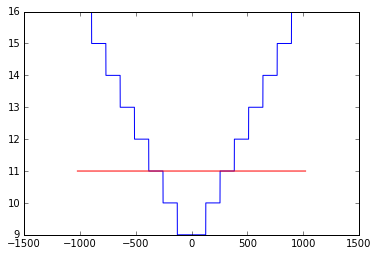

In [39]:
print "parece ser que con m = %i, el rango optimo se extiende a partir -255 a 255" % 2**7


plt.plot(range(-1023,1023),result[2], 'b')
    
plt.plot(range(-1023,1023), [11] * len(result[0]), 'r',) # 11 es la longitud en binario con signo

plt.show()

In [40]:

# export to a file to use gnuplot
y = range(-1023,1023)
for j in range(len(result[0])):
    print y[j],"\t",
    for i in range(len(result)):
        print result[i][j], "\t", 
    print "\n"

-1023 	38 	23 	16 	13 	12 	

-1022 	38 	23 	16 	13 	12 	

-1021 	38 	23 	16 	13 	12 	

-1020 	38 	23 	16 	13 	12 	

-1019 	38 	23 	16 	13 	12 	

-1018 	38 	23 	16 	13 	12 	

-1017 	38 	23 	16 	13 	12 	

-1016 	38 	23 	16 	13 	12 	

-1015 	38 	23 	16 	13 	12 	

-1014 	38 	23 	16 	13 	12 	

-1013 	38 	23 	16 	13 	12 	

-1012 	38 	23 	16 	13 	12 	

-1011 	38 	23 	16 	13 	12 	

-1010 	38 	23 	16 	13 	12 	

-1009 	38 	23 	16 	13 	12 	

-1008 	38 	23 	16 	13 	12 	

-1007 	38 	23 	16 	13 	12 	

-1006 	38 	23 	16 	13 	12 	

-1005 	38 	23 	16 	13 	12 	

-1004 	38 	23 	16 	13 	12 	

-1003 	38 	23 	16 	13 	12 	

-1002 	38 	23 	16 	13 	12 	

-1001 	38 	23 	16 	13 	12 	

-1000 	38 	23 	16 	13 	12 	

-999 	38 	23 	16 	13 	12 	

-998 	38 	23 	16 	13 	12 	

-997 	38 	23 	16 	13 	12 	

-996 	38 	23 	16 	13 	12 	

-995 	38 	23 	16 	13 	12 	

-994 	38 	23 	16 	13 	12 	

-993 	38 	23 	16 	13 	12 	

-992 	38 	23 	16 	13 	12 	

-991 	37 	23 	16 	13 	12 	

-990 	37 	23 	16 	13 	12 	

-989 	37 	23 	16 	13 	12

¿Cuál es el mayor valor de M que permite lograr un máximo ahorro de hasta 6 bits? 
¿Cuál es el rango de entrada óptima ahora?


In [41]:
# buscamos conseguir el mayor valor de M con un ahorro maximo de 6 bits
#hagamos un plot con varios rangos

result = []
for m in range(2,8):
    m = 2 ** m
    tmp_result = []
    for i in range(-1023,1023):
        tmp_result.append(len(rice(i,m)))
    result.append(tmp_result)

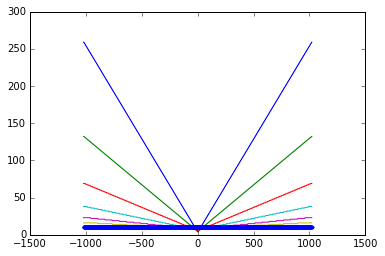

In [42]:
for i,r in enumerate(result):
    plt.plot(range(-1023,1023),r)
    
plt.plot(range(-1023,1023), [11] * len(result[0]), 'b.',) # 11 es la longitud en binario con signo

plt.show()

In [43]:

# export to a file to use gnuplot
y = range(-1023,1023)
for j in range(len(result[0])):
    print y[j],"\t",
    for i in range(len(result)):
        print result[i][j], "\t", 
    print "\n"

-1023 	259 	132 	69 	38 	23 	16 	

-1022 	259 	132 	69 	38 	23 	16 	

-1021 	259 	132 	69 	38 	23 	16 	

-1020 	259 	132 	69 	38 	23 	16 	

-1019 	258 	132 	69 	38 	23 	16 	

-1018 	258 	132 	69 	38 	23 	16 	

-1017 	258 	132 	69 	38 	23 	16 	

-1016 	258 	132 	69 	38 	23 	16 	

-1015 	257 	131 	69 	38 	23 	16 	

-1014 	257 	131 	69 	38 	23 	16 	

-1013 	257 	131 	69 	38 	23 	16 	

-1012 	257 	131 	69 	38 	23 	16 	

-1011 	256 	131 	69 	38 	23 	16 	

-1010 	256 	131 	69 	38 	23 	16 	

-1009 	256 	131 	69 	38 	23 	16 	

-1008 	256 	131 	69 	38 	23 	16 	

-1007 	255 	130 	68 	38 	23 	16 	

-1006 	255 	130 	68 	38 	23 	16 	

-1005 	255 	130 	68 	38 	23 	16 	

-1004 	255 	130 	68 	38 	23 	16 	

-1003 	254 	130 	68 	38 	23 	16 	

-1002 	254 	130 	68 	38 	23 	16 	

-1001 	254 	130 	68 	38 	23 	16 	

-1000 	254 	130 	68 	38 	23 	16 	

-999 	253 	129 	68 	38 	23 	16 	

-998 	253 	129 	68 	38 	23 	16 	

-997 	253 	129 	68 	38 	23 	16 	

-996 	253 	129 	68 	38 	23 	16 	

-995 	252 	129 	68 	38 	

In [170]:
print "El mayor valor de m que permite un ahorro de hasta 6 bits se consigue con M = %i en los rangos [-7,7]" % 2**3

El mayor valor de m que permite un ahorro de hasta 6 bits se consigue con M = 8 en los rangos [-7,7]
